Emotion of the Cryptocurrency Market: VADER sentiment analysis & classification using MultinomialNB, Logistic Regression, SGD classifier


In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir("/content/drive/My Drive/data/twitter-emotion-cryptocurrency/")
os.listdir()

['anger.json',
 'fear.json',
 'greed.json',
 'hateful.json',
 'joy.json',
 'sadness.json']

In [0]:
import json
with open('anger.json') as json_file:
    anger = pd.read_json(json_file)
anger["emotion"] = "anger"
anger = anger.rename(columns={0:"body"})

with open('fear.json') as json_file:
    fear = pd.read_json(json_file)
fear["emotion"] = "fear"
fear = fear.rename(columns={0:"body"})

with open('greed.json') as json_file:
    greed = pd.read_json(json_file)
greed["emotion"] = "greed"
greed = greed.rename(columns={0:"body"})

with open('hateful.json') as json_file:
    hateful = pd.read_json(json_file)
hateful["emotion"] = "hateful"
hateful = hateful.rename(columns={0:"body"})

with open('joy.json') as json_file:
    joy = pd.read_json(json_file)
joy["emotion"] = "joy"
joy = joy.rename(columns={0:"body"})

with open('sadness.json') as json_file:
    sadness = pd.read_json(json_file)
sadness["emotion"] = "sadness"
sadness = sadness.rename(columns={0:"body"})        
             
df = pd.concat([anger,fear,greed,hateful,joy,sadness], ignore_index=True)
df["id"] = df.index + 1
df = df[['id', 'body', 'emotion']]

In [0]:
import spacy
def preprocess(text):
    nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser","ner"]) 
    token_list = []
    for token in nlp(text):
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            #token.shape_, token.is_alpha, token.is_stop)
        if token.is_stop == False and token.is_alpha == True:
            if token.lemma_.isalpha():
                token_list.append(token.lemma_)
    return token_list

In [0]:
import nltk 
import string
import re
#removing 
def punctuation_removal(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

df['body_punctuation'] = df['body'].apply(lambda x: punctuation_removal(x))
anger['body_punctuation'] = anger['body'].apply(lambda x: punctuation_removal(x))
fear['body_punctuation'] = fear['body'].apply(lambda x: punctuation_removal(x))
greed['body_punctuation'] = greed['body'].apply(lambda x: punctuation_removal(x))
hateful['body_punctuation'] = hateful['body'].apply(lambda x: punctuation_removal(x))
joy['body_punctuation'] = joy['body'].apply(lambda x: punctuation_removal(x))
sadness['body_punctuation'] = sadness['body'].apply(lambda x: punctuation_removal(x))

In [0]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['body_tokenized'] = df['body_punctuation'].apply(lambda x: tokenization(x.lower()))
anger['body_tokenized'] = anger['body_punctuation'].apply(lambda x: tokenization(x.lower()))
fear['body_tokenized'] = fear['body_punctuation'].apply(lambda x: tokenization(x.lower()))
greed['body_tokenized'] = greed['body_punctuation'].apply(lambda x: tokenization(x.lower()))
hateful['body_tokenized'] = hateful['body_punctuation'].apply(lambda x: tokenization(x.lower()))
joy['body_tokenized'] = joy['body_punctuation'].apply(lambda x: tokenization(x.lower()))
sadness['body_tokenized'] = sadness['body_punctuation'].apply(lambda x: tokenization(x.lower()))

In [0]:
nltk.download("stopwords")
stopword = nltk.corpus.stopwords.words('english')
stopword.extend(['https','co','Listia','Join','using','RT','stuff','Info',
                 'rt','code','xnk','btc','bitcoin','ether','eth','ethereum',
                 'ripple','xrp','ltc','listia','join','selling','buying','info',
                 'crypto','cryptocurrency','blockchain','one','project','team',
                 'people','cindxtoken','btcusd','exchange','exchanges','new', 'york',
                 'london','time','timeframe','amp','stock','market','learn','think',
                 'utc','xb','bch','read','cindx','ooobtc','cmhkvj','dmtthl','cdfqlk',
                 'dpxxgj','bkbfsr','httpstcopeaenjdzs','httpstcoasyzapmtz','httpstconufwlfbsw',
                 'httpstcomluwxepaa','httpstcorfdpovmdu','httpstcosouopvw','httpstcofutdfvalum',
                 'cnnclinton','baracudabella',])




def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['body_stopwordremoved'] = df['body_tokenized'].apply(lambda x: remove_stopwords(x))
anger['body_stopwordremoved'] = anger['body_tokenized'].apply(lambda x: remove_stopwords(x))
fear['body_stopwordremoved'] = fear['body_tokenized'].apply(lambda x: remove_stopwords(x))
greed['body_stopwordremoved'] = greed['body_tokenized'].apply(lambda x: remove_stopwords(x))
hateful['body_stopwordremoved'] = hateful['body_tokenized'].apply(lambda x: remove_stopwords(x))
joy['body_stopwordremoved'] = joy['body_tokenized'].apply(lambda x: remove_stopwords(x))
sadness['body_stopwordremoved'] = sadness['body_tokenized'].apply(lambda x: remove_stopwords(x))
df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


id  ...                               body_stopwordremoved
0   1  ...  [amritabithi, youre, gonna, hate, token, runni...
1   2  ...  [stauffelbaker, everyone, loves, hate, eosio, ...
2   3  ...  [dilanchi, ifiwas, mad, scientist, ill, make, ...
3   4  ...  [cash, price, turns, bullish, yet, hate, wont,...
4   5  ...  [see, tesla, fanboys, angry, idea, thieving, e...
5   6  ...  [buzz, officially, back, love, hate, stay, tho...
6   7  ...  [youre, trying, scare, move, along, tone, amus...
7   8  ...  [hate, cryptocurrencies, burning, passion, nev...
8   9  ...  [ccnmarkets, single, participant, allowed, pri...
9  10  ...                                      [icon, sucks]

[10 rows x 6 columns]

In [0]:
Stemmer = nltk.PorterStemmer()
#Stemming
def stemming(text):
    text = [Stemmer.stem(word) for word in text]
    return text

df['body_stemmed'] = df['body_stopwordremoved'].apply(lambda x: stemming(x))
anger['body_stemmed'] = anger['body_stopwordremoved'].apply(lambda x: stemming(x))
fear['body_stemmed'] = fear['body_stopwordremoved'].apply(lambda x: stemming(x))
greed['body_stemmed'] = greed['body_stopwordremoved'].apply(lambda x: stemming(x))
hateful['body_stemmed'] = hateful['body_stopwordremoved'].apply(lambda x: stemming(x))
joy['body_stemmed'] = joy['body_stopwordremoved'].apply(lambda x: stemming(x))
sadness['body_stemmed'] = sadness['body_stopwordremoved'].apply(lambda x: stemming(x))
df.head()

id  ...                                       body_stemmed
0   1  ...  [amritabithi, your, gonna, hate, token, run, f...
1   2  ...  [stauffelbak, everyon, love, hate, eosio, keep...
2   3  ...  [dilanchi, ifiwa, mad, scientist, ill, make, m...
3   4  ...  [cash, price, turn, bullish, yet, hate, wont, ...
4   5  ...  [see, tesla, fanboy, angri, idea, thiev, eu, c...

[5 rows x 7 columns]

In [0]:
import nltk
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()
#Lemmatization
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['body_lemma'] = df['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
anger['body_lemma'] = anger['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
fear['body_lemma'] = fear['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
greed['body_lemma'] = greed['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
hateful['body_lemma'] = hateful['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
joy['body_lemma'] = joy['body_stopwordremoved'].apply(lambda x: lemmatizer(x))
sadness['body_lemma'] = sadness['body_stopwordremoved'].apply(lambda x: lemmatizer(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
df['body_lemmastring'] = df['body_lemma'].agg(lambda x: ' '.join(map(str, x)))
df.tail(-100000)

id  ...                                   body_lemmastring
100000  100001  ...  digitalvillain tech company still care ai iot ...
100001  100002  ...  commenters saying could pay lower fee wait mis...
100002  100003  ...  senior research scientist robotics startup cyb...
100003  100004  ...  current top dapps volumelastday kyber idex for...
100004  100005  ...  cinsbit pleased announce fortem capital token ...
...        ...  ...                                                ...
328357  328358  ...  zackvoell digital gold every function gold bet...
328358  328359  ...  never see adoption principle privacy fungibili...
328359  328360  ...  blockbits incent target broken economy reward ...
328360  328361  ...  sad cant proud watching world getting decentra...
328361  328362  ...             sad thing sheep buy po httpstcohpeocsc

[228362 rows x 9 columns]

After experimentation, it is found that the names of the actual currencies that we are analysing are not important as we try to remain focused on opinion and emotions. Hence, They are removed , along with many other words from the list of stop words.

(-0.5, 399.5, 199.5, -0.5)

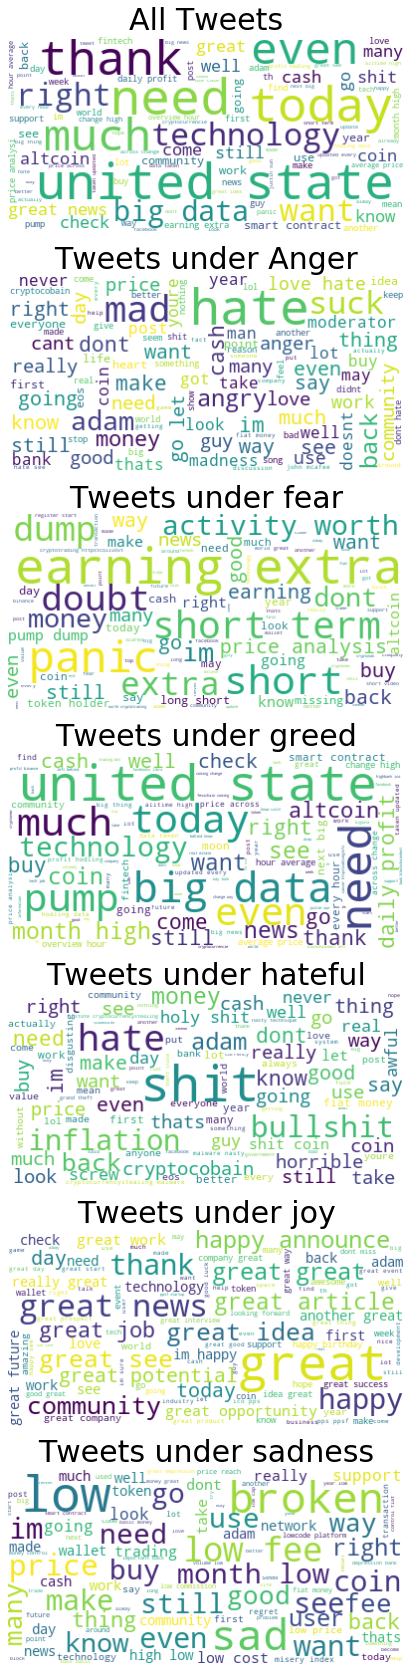

In [0]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import itertools
fig, ax = plt.subplots(7, 1, figsize  = (30,30))
#create strings for wordclouds
tweet_all = ' '.join(list(itertools.chain.from_iterable(df.body_lemma)))
tweet_anger = ' '.join(list(itertools.chain.from_iterable(anger.body_lemma)))
tweet_fear = ' '.join(list(itertools.chain.from_iterable(fear.body_lemma)))
tweet_greed = ' '.join(list(itertools.chain.from_iterable(greed.body_lemma)))
tweet_hateful = ' '.join(list(itertools.chain.from_iterable(hateful.body_lemma)))
tweet_joy = ' '.join(list(itertools.chain.from_iterable(joy.body_lemma)))
tweet_sadness = ' '.join(list(itertools.chain.from_iterable(sadness.body_lemma)))
#create wordclouds
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_all)
wordcloud_anger = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_anger)
wordcloud_fear = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_fear)
wordcloud_greed = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_greed)
wordcloud_hateful = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_hateful)
wordcloud_joy = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_joy)
wordcloud_sadness = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_sadness)

#displaying the wordclouds
ax[0].imshow(wordcloud_all, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_anger, interpolation='bilinear')
ax[1].set_title('Tweets under Anger',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_fear, interpolation='bilinear')
ax[2].set_title('Tweets under fear',fontsize=30)
ax[2].axis('off')
ax[3].imshow(wordcloud_greed, interpolation='bilinear')
ax[3].set_title('Tweets under greed',fontsize=30)
ax[3].axis('off')
ax[4].imshow(wordcloud_hateful, interpolation='bilinear')
ax[4].set_title('Tweets under hateful',fontsize=30)
ax[4].axis('off')
ax[5].imshow(wordcloud_joy, interpolation='bilinear')
ax[5].set_title('Tweets under joy',fontsize=30)
ax[5].axis('off')
ax[6].imshow(wordcloud_sadness, interpolation='bilinear')
ax[6].set_title('Tweets under sadness',fontsize=30)
ax[6].axis('off')

#wordcloud.to_file("img/wordclouds.png")

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(df['body_punctuation'])):
    vs = analyzer.polarity_scores(s)
    compound.append(vs["compound"])
df["compound"] = compound

100%|██████████| 328362/328362 [02:19<00:00, 2353.20it/s]


VADER (Valence Aware Dictionary and sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.
VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.
Additionally, VADER can also handle emoji's , slangs, emoticons.

In [0]:
pip install "notebook>=5.3" "ipywidgets>=7.2"

In [0]:
import plotly.graph_objects as go
fig = go.Figure()

emos = ['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']

for emotion in emos:
    fig.add_trace(go.Violin(x=df['emotion'][df['emotion'] == emotion],
                            y=df['compound'][df['emotion'] == emotion],
                            name=emotion,
                            box_visible=True,
                            meanline_visible=True))

fig.show()

In [0]:
training_data = df.sample(frac=1)[:int(0.7*len(df))]
test_data = df.sample(frac=1)[int(0.7*len(df)):]

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = df.body_lemma ,df.emotion
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
market_emotions = sorted(df["emotion"].unique())
print(market_emotions)

['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']


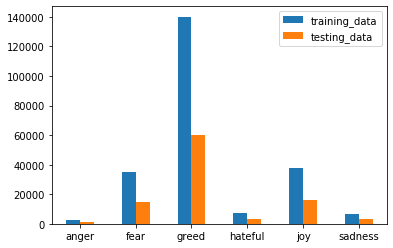

In [0]:
import matplotlib.pyplot as plt
#matplotlib inline
market_emotions_training = training_data.groupby('emotion').size().tolist()
market_emotions_test = test_data.groupby('emotion').size().tolist()
datatoplot = pd.DataFrame({'training_data': market_emotions_training,'testing_data': market_emotions_test}, index=market_emotions)
ax = datatoplot.plot.bar(rot=0)

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

text_clf = Pipeline([
     ('vect', CountVectorizer()),
     ('clf', MultinomialNB()), 
])

In [0]:
text_clf.fit(training_data.body_lemmastring, training_data.emotion)
#Pipeline(...)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [0]:
import numpy as np
predicted = text_clf.predict(test_data.body_lemmastring)
print('The Accuracy is %s' % np.mean(predicted == test_data.emotion))

The Accuracy is 0.8588961414693074


In [0]:
cr = classification_report(y_true = test_data.emotion,
                      y_pred = predicted,
                      labels=None, target_names=market_emotions,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted, test_data.emotion))
print(cr)

The Accuracy is 0.8588961414693074
              precision    recall  f1-score   support

       anger       0.79      0.09      0.16      1106
        fear       0.94      0.70      0.81     15075
       greed       0.85      0.96      0.90     59838
     hateful       0.80      0.47      0.59      3154
         joy       0.85      0.87      0.86     16376
     sadness       0.94      0.26      0.40      2960

    accuracy                           0.86     98509
   macro avg       0.86      0.56      0.62     98509
weighted avg       0.86      0.86      0.85     98509



In [0]:
#baseline accuracy
print('The Accuracy is %s' % np.mean(test_data.emotion == training_data.emotion.mode()[0]))

The Accuracy is 0.6074368839395385


In [0]:
#implement undersampling
emotionspeech_value_index = training_data.emotion.value_counts().index
random_xindices = []
under_sample_indices = []
for x in range(len(emotionspeech_value_index)):
    x_indices = training_data[training_data.emotion == training_data.emotion.value_counts().index[x]].index
    random_xindices = np.random.choice(x_indices,
                                       min(training_data.emotion.value_counts()),
                                       replace=False)
    under_sample_indices.append(training_data.loc[random_xindices])
    
#Get Balance Dataframe   
under_sample = pd.concat(under_sample_indices) 

[2525, 2525, 2525, 2525, 2525, 2525]

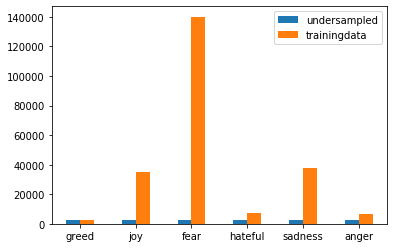

In [0]:
#matplotlib inline
undersamples = under_sample.emotion.value_counts().tolist()
trainingdata = training_data.emotion.value_counts().tolist()
df = pd.DataFrame({'undersampled': undersamples,'trainingdata': market_emotions_training},
                  index=market_emotions)
ax = df.plot.bar(rot=0)

under_sample.emotion.value_counts().tolist()

In [0]:
text_clf.fit(under_sample.body_lemmastring, under_sample.emotion)
predicted_balance = text_clf.predict(test_data.body_lemmastring)
print('The Accuracy is %s' % np.mean(predicted_balance == test_data.emotion))

cr2 = classification_report(y_true = test_data.emotion,
                      y_pred = predicted_balance,
                      labels=None, target_names=market_emotions,
                      sample_weight=None, digits=2,
                      output_dict=False)
print('The Accuracy is %s' % accuracy_score(predicted_balance, test_data.emotion))
print(cr2)

The Accuracy is 0.6592697113969282
The Accuracy is 0.6592697113969282
              precision    recall  f1-score   support

       anger       0.15      0.92      0.26      1106
        fear       0.82      0.68      0.74     15075
       greed       0.96      0.57      0.71     59838
     hateful       0.26      0.80      0.39      3154
         joy       0.68      0.89      0.77     16376
     sadness       0.21      0.91      0.34      2960

    accuracy                           0.66     98509
   macro avg       0.51      0.79      0.54     98509
weighted avg       0.84      0.66      0.70     98509



Text(33.0, 0.5, 'Predicted Class label')

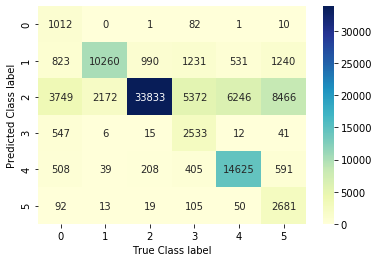

In [0]:
#Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(test_data.emotion, predicted_balance)
sns.heatmap(cm2,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [0]:
#implement the grid search
from sklearn.model_selection import GridSearchCV
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'clf__alpha': (1, .1),
}

In [0]:
gs_clf = GridSearchCV(text_clf, parameters, cv=5, iid=False, n_jobs=-1)
gs_clf = gs_clf.fit(training_data.body_lemmastring, training_data.emotion)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



In [0]:
prediction3 = gs_clf.predict(test_data.body_lemmastring)

In [0]:
gs_clf.best_score_

0.8625382311678301

In [0]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.1
vect__ngram_range: (1, 2)


In [0]:
cv_results = pd.DataFrame(gs_clf.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       7.344868      0.086645  ...        0.000526                4
1      18.737784      0.188184  ...        0.000391                2
2       7.293665      0.242973  ...        0.000232                3
3      17.673803      2.133940  ...        0.000508                1

[4 rows x 15 columns]

In [0]:
print('accuracy %s' % accuracy_score(test_data.emotion, prediction3))

accuracy 0.9297120060096031


In [0]:
cm3 = classification_report(test_data.emotion, prediction3)
print(cm3)

              precision    recall  f1-score   support

       anger       0.63      0.71      0.67      1106
        fear       0.90      0.94      0.92     15075
       greed       0.98      0.93      0.95     59838
     hateful       0.74      0.84      0.79      3154
         joy       0.89      0.97      0.92     16376
     sadness       0.80      0.90      0.85      2960

    accuracy                           0.93     98509
   macro avg       0.82      0.88      0.85     98509
weighted avg       0.93      0.93      0.93     98509



In [0]:
# TODO: Write code here to search for a better model
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
lr = Pipeline([('vect', CountVectorizer()),
               ('clf', LogisticRegression(max_iter=500),),
              ])
lr.fit(training_data.body_lemmastring, training_data.emotion)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=500,
                                    multi_class='auto', n_jobs=None,
                          

In [0]:
predictions4 = lr.predict(test_data.body_lemmastring)
print('accuracy %s' % accuracy_score(predictions4, test_data.emotion))
print(classification_report(test_data.emotion, predictions4))

accuracy 0.9437919377924859
              precision    recall  f1-score   support

       anger       0.70      0.70      0.70      1106
        fear       0.93      0.89      0.91     15075
       greed       0.96      0.97      0.96     59838
     hateful       0.85      0.87      0.86      3154
         joy       0.94      0.96      0.95     16376
     sadness       0.88      0.86      0.87      2960

    accuracy                           0.94     98509
   macro avg       0.88      0.87      0.87     98509
weighted avg       0.94      0.94      0.94     98509



Text(33.0, 0.5, 'Predicted Class label')

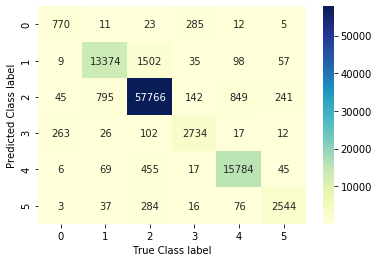

In [0]:
cm4 = confusion_matrix(test_data.emotion, predictions4)
sns.heatmap(cm4,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

In [0]:
#pipeline of feature engineering and model
from sklearn.linear_model import SGDClassifier
from time import time
import logging
from pprint import pprint
lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(tol=1e-3)),
              ])
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
     #'vect__max_features': (None, 5000, 10000, 50000),
    'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
     'tfidf__use_idf': (True, False),
     #'tfidf__norm': ('l1', 'l2'),
    'clf__max_iter': (20,),
    'clf__alpha': (0.00001, 0.000001),
    'clf__penalty': ('l2', 'elasticnet'),
     #'clf__max_iter': (10, 50, 80),
}

In [0]:
grid_search = GridSearchCV(lr, parameters, cv=5,
                               n_jobs=-1, verbose=1)
print("Performing grid search...")
print("pipeline:", [name for name, _ in lr.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(training_data.body_lemmastring, training_data.emotion)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 40.5min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 51.7min finished


done in 3126.053s

Best score: 0.929
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	tfidf__use_idf: False
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


In [0]:
cv_results2 = pd.DataFrame(gs_clf.cv_results_)
cv_results2

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       7.712908      0.161232  ...        0.000989                4
1      20.034027      0.247510  ...        0.001364                2
2       7.895667      0.488551  ...        0.001410                3
3      19.904495      2.848547  ...        0.001148                1

[4 rows x 15 columns]

In [0]:
prediction5 = grid_search.predict(test_data.body_lemmastring)
print('accuracy %s' % accuracy_score(prediction5, test_data.emotion))
print(classification_report(test_data.emotion, prediction5))

accuracy 0.9302398765595021
              precision    recall  f1-score   support

       anger       0.66      0.72      0.69      1030
        fear       0.94      0.81      0.87     15163
       greed       0.95      0.96      0.95     60089
     hateful       0.85      0.82      0.83      3072
         joy       0.92      0.98      0.95     16298
     sadness       0.82      0.86      0.84      2857

    accuracy                           0.93     98509
   macro avg       0.86      0.86      0.86     98509
weighted avg       0.93      0.93      0.93     98509



Text(33.0, 0.5, 'Predicted Class label')

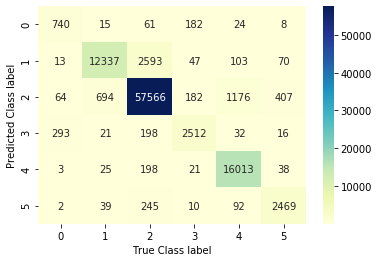

In [0]:
cm5 = confusion_matrix(test_data.emotion, prediction5)
sns.heatmap(cm5,annot=True,fmt="d",cmap="YlGnBu")
plt.xlabel("True Class label")
plt.ylabel("Predicted Class label")

Clustering

In [0]:
#vectorize the data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',use_idf=True)
tweets = tfidf_vectorizer.fit_transform(df['body_lemmastring'])
#print(vectorizer.get_feature_names())

In [0]:
tweets.shape

(328362, 407614)

In [0]:
# TODO: Enter code here to cluster the vectorized data
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans3 = KMeans(n_clusters=3,n_init=8,n_jobs=-1).fit(tweets)

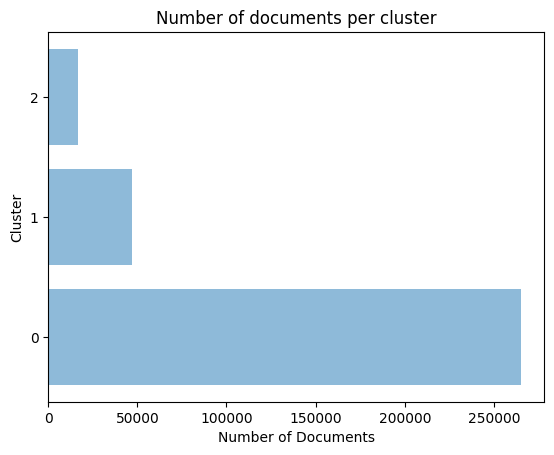

In [0]:
# TODO: Enter code here to produce a bar plot of the cluster size
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cluster_labels = pd.DataFrame(kmeans3.labels_)


objects = ('0', '1', '2')
y_pos = np.arange(len(objects))
counts = cluster_labels.groupby(0).size().tolist()

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

In [0]:
#Summarise clusters
# TODO: Enter code here to compute the cluster summaries and print them
n = int(input("Enter your value: "))
centroids3 = pd.DataFrame(kmeans3.cluster_centers_).transpose()
for i in range(centroids3.shape[1]): 
    terms3 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids3.iloc[:,i]))
    sortedterms3 = sorted(terms3.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms3[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
         term  Centroid
0         big  0.014695
1  investment  0.012519
2        high  0.011277
3       price  0.010331
4     bullish  0.009760


The cluster number 2
     term  Centroid
0   great  0.138532
1    good  0.013847
2    news  0.011595
3  future  0.011386
4    idea  0.011264


The cluster number 3
      term  Centroid
0    extra  0.231432
1  earning  0.231356
2   cdfqlk  0.009356
3   dpxxgj  0.008336
4   bkbfsr  0.007192


In [0]:
#Tuning k-means algorithm with the elbow method
# plot for the elbow method
elbow_inertia = []
for x in range(1,10):
    kmeans = KMeans(n_clusters=x,n_init=8,n_jobs=-1).fit(tweets)
    inertias = kmeans.inertia_
    elbow_inertia.append(inertias)
print(elbow_inertia)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[327296.2845018491, 325541.1988588906, 324957.34518670355, 324341.56975747657, 323492.1018799691, 323123.9834522707, 322531.1001087937, 321878.03333588876, 321817.3510733868]


<function matplotlib.pyplot.show>

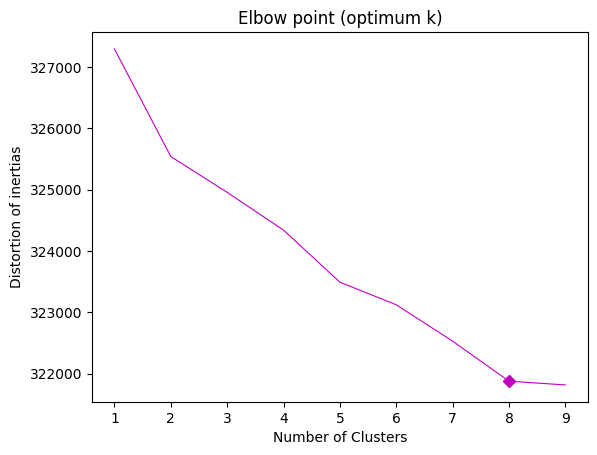

In [0]:
import matplotlib.pyplot as plt
#Elbow method
plt.plot(range(1,10),elbow_inertia
         ,marker = 'D',markevery=[7]
         ,color = 'm',linewidth = 0.8)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion of inertias')
plt.title('Elbow point (optimum k)')
plt.show

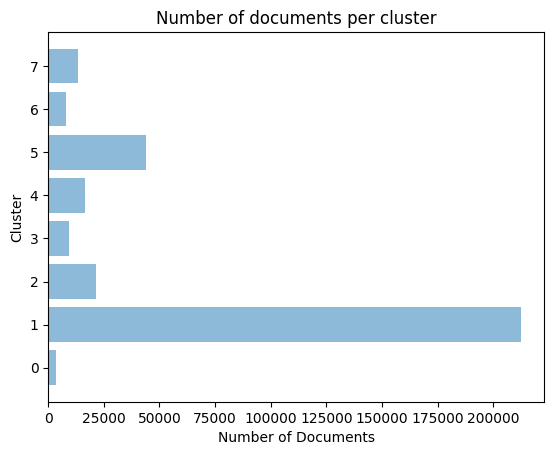

In [0]:
kmeans8 = KMeans(n_clusters=8,n_init=8,n_jobs=-1).fit(tweets)
cluster_labels2 = pd.DataFrame(kmeans8.labels_)
objects2 = ('0', '1', '2', '3', '4', '5', '6', '7')
y_pos2 = np.arange(len(objects2))
counts2 = cluster_labels2.groupby(0).size().tolist()

plt.barh(y_pos2, counts2, align='center', alpha=0.5)
plt.yticks(y_pos2, objects2)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

In [0]:
# Clustering with k = 8
n = int(input("Enter your value: "))
centroids8 = pd.DataFrame(kmeans8.cluster_centers_).transpose()
for i in range(centroids8.shape[1]): 
    terms8 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids8.iloc[:,i]))
    sortedterms8 = sorted(terms8.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms8[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
                 term  Centroid
0              throat  0.167975
1  httpstcofutdfvalum  0.124164
2        humanitarian  0.078936
3               zcash  0.042502
4          cnnclinton  0.000561


The cluster number 2
                term  Centroid
0  httpstcorfdpovmdu  0.017413
1    httpstcosouopvw  0.005550
2               sigh  0.005541
3             psycho  0.004215
4     barracudabella  0.003855


The cluster number 3
                term  Centroid
0    httpstcocircgcv  0.011066
1  httpstcopeaenjdzs  0.009206
2            privacy  0.004974
3    httpstcojbtjqof  0.004785
4           salecost  0.004453


The cluster number 4
                term  Centroid
0           roadmaps  0.027316
1            privacy  0.024654
2    httpstcojbtjqof  0.011526
3             psycho  0.009446
4  httpstcorfdpovmdu  0.009252


The cluster number 5
                term  Centroid
0      stockstotrade  0.009358
1  httpstcoyevnytkkm  0.007193
2  httpstcolkxgpctgb  

In [0]:
#Rand-index since we have gold standard class labels
#compute the Rand indices for the two clusterings
from sklearn import metrics
sample = df[0:10000]
sample_tweets = tfidf_vectorizer.fit_transform(sample["body_lemmastring"])
labels_true = sample.emotion.tolist()
kmeans3_sample = KMeans(n_clusters=3
                        ,n_init=8,n_jobs=-1).fit(sample_tweets)
kmeans8_sample = KMeans(n_clusters=8
                        ,n_init=8,n_jobs=-1).fit(sample_tweets)

In [0]:
#part of the function implemented here is referred from the link given below:
#https://stackoverflow.com/questions/49586742/rand-index-function-clustering-performance-evaluation
from scipy.special import comb
from itertools import combinations
import numpy as np

def rand_score (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [0]:
#rand score for k=3
labels_pred = kmeans3_sample.predict(sample_tweets).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 59.02 %
The adjusted rand score is 18.6 %


In [0]:
#rand score for k=8
labels_pred = kmeans8_sample.predict(sample_tweets).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 59.59 %
The adjusted rand score is 22.33 %


*The rand index is calculated as $R=\frac{a+b}{\begin{pmatrix} n \\ 2\end{pmatrix}}$, where a is the number of times a pair of elements is grouped together by the clustering methods and b is when they are not. n refers to the number of elements present.
Here, we compare the given categories i.e true labels to the clustering with k=3,8; The adjusted rand index is the rand index adjusted for chance is between -1 and 1, which in our case shows that k=8 is effective.
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
Disadvantages of Rand index:
-scale from 0 to 1 so it cannot be compared with a random set, ARI between -1 and 1 proves to useful here
-accountability due to overlap of pairs is absent, can be taken care with ARI
-High RI but low ARI, when there are many clusters, there is a higher chance that a pair of items in both sets are in different clusters.*

Prediction of the sentiment classification tagged #bitcoin or #crypto from today's date

In [0]:
import codecs
from bs4 import BeautifulSoup
import requests
import tweepy as tw

In [0]:
consumer_key= 'xvjAESJdj1AWMF9wwaNKZiqu8' 
consumer_secret= '6V6D8HyRJwnLc8v44yQ919srN7CENeO6fR2rrvlU1aWV0AsTQR'


access_token='31371694-CFWrUZXh2ChWth8SaQEnf68ibnVdQpNVpZ19mCxBG'
access_token_secret='3wKji7khqOUPtHupUiuJpCYvDX8TV4ClMppkgVuM6vgZN'
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [0]:
from datetime import date

# search terms and current date
search_words = "#bitcoin","#crypto"
date_since = date.today().strftime("%Y-%m-%d")

In [0]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(100)

# Collect a list of tweets
[tweet.text for tweet in tweets]

['RT @Ledger_Support: Must-read for those who are new to the world of #crypto\n\nPlease help us in spreading best practices against phishing at…',
 'RT @aeron_aero: Aviation Authority portal will be presented to @EASA member state at the end of March, yet another roadmap milestone for Ae…',
 'RT @NYCryptoYoshi: CRYPTO YOSHI PREMIUM VIP\nWE PAY YOU COMMISION!  \n1. TA Charts Forecast\nClassical, Technical, Trend analysis\n2. Trading I…',
 '🔄 Prices update in $USD (1 hour):\n\n$BTC - 9116.0 $  (-0.14 %)\n$ETH - 244.79 $  (-0.15 %)\n$XRP - 0.24 $    (-0.29 %)… https://t.co/AAUHJPIdm5',
 'TODAY PAYING HYIPS - 7/03/2020! EXWAY and DEXAU ENTERPRISE - GOOD RESULTS...\n\nhttps://t.co/h3jDZLxc0R\n\n#EmilyNews… https://t.co/4Whjpcfu14',
 'RT @real12k: People have started stocking up on $ACED while they can, price is now currently 140 sats on Graviex.\nhttps://t.co/bgceDPhN3F…',
 'RT @Koles_News: #KCN: @loopringorg starts up #zkRollup exchange on #Ethereum mainnet\n_\n#Loopring #Bitcoin #FintechN

In [0]:
# Iterate and print tweets
for tweet in tweets:
    print(tweet.text)

In [0]:
new_search = " -filter:retweets".join(search_words)
new_search

'#bitcoin -filter:retweets#crypto'

In [0]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(100)
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.text] for tweet in tweets]
users_locs

[['KrakenPrices',
  '',
  '🔄 Prices update in $USD (1 hour):\n\n$BTC - 9116.0 $  (-0.14 %)\n$ETH - 244.79 $  (-0.15 %)\n$XRP - 0.24 $    (-0.29 %)… https://t.co/AAUHJPIdm5'],
 ['EmilyHyipNews',
  '',
  'TODAY PAYING HYIPS - 7/03/2020! EXWAY and DEXAU ENTERPRISE - GOOD RESULTS...\n\nhttps://t.co/h3jDZLxc0R\n\n#EmilyNews… https://t.co/4Whjpcfu14'],
 ['coinpricenow',
  '',
  '1 Bitcoin ( #BTC )\nDollar: 9119.84$ \n\n1 Bitcoin Cash ( #BCH )\nDollar: 3,45.86$ \n\n1 Ethereum ( #ETH )\nDollar: 244.36… https://t.co/FOtPPskwgV'],
 ['Rakamoto',
  'Worldwide',
  'The #crypto #ecosystem tends to see regulations as “the big bad wolf.” In this #narrative, government and regulator… https://t.co/ja1VNSDluS'],
 ['Rakamoto',
  'Worldwide',
  'Within the #crypto #community, debates have been raging about the merits of #popular encrypted #messaging #apps suc… https://t.co/SjOjDSlUM0'],
 ['MXInvesting',
  '',
  '⬇️ Sell BTC/USD - Bitcoin US Dollar on 1H time frame\nCurrent price: 9,123.1\nBulls↗️ Power 29%

In [0]:
tweet_text = pd.DataFrame(data=users_locs, 
                    columns=['user', "location","text"])
tweet_text

user  ...                                               text
0     KrakenPrices  ...  🔄 Prices update in $USD (1 hour):\n\n$BTC - 91...
1    EmilyHyipNews  ...  TODAY PAYING HYIPS - 7/03/2020! EXWAY and DEXA...
2     coinpricenow  ...  1 Bitcoin ( #BTC )\nDollar: 9119.84$ \n\n1 Bit...
3         Rakamoto  ...  The #crypto #ecosystem tends to see regulation...
4         Rakamoto  ...  Within the #crypto #community, debates have be...
..             ...  ...                                                ...
95   cryptoWhisper  ...  #Bitcoin #Crypto #BTCUSD \n9600 in coming days...
96   betbybitcoins  ...  07 March 2020 Betting Tips https://t.co/nnKvbH...
97     WiseAnalyze  ...  While H&amp;S still possible, #BTC draws anoth...
98  ElixiumCapital  ...  This Bitcoin chart is insane! Oh, wait… that’s...
99    official_ckm  ...  ✅Did you know what Satoshi Nakamoto means? \n\...

[100 rows x 3 columns]

In [0]:
tweet_text['text'] = tweet_text['text'].apply(lambda x: punctuation_removal(x))
tweet_text['text'] = tweet_text['text'].apply(lambda x: tokenization(x.lower()))    
tweet_text['text'] = tweet_text['text'].apply(lambda x: remove_stopwords(x))
tweet_text['text'] = tweet_text['text'].apply(lambda x: lemmatizer(x))
tweet_text['text'] = tweet_text['text'].agg(lambda x: ' '.join(map(str, x)))

In [0]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm
analyzer = SentimentIntensityAnalyzer()
compound = []
for i,s in enumerate(tqdm(tweet_text['text'])):
    vs = analyzer.polarity_scores(s)
    compound.append(vs["compound"])
tweet_text["compound"] = compound

100%|██████████| 100/100 [00:00<00:00, 4941.28it/s]


In [0]:
tweet_text['predicted_sentiment'] = lr.predict(tweet_text.text)

In [0]:
 tweet_text

user                 location  ... compound  predicted_sentiment
0     KrakenPrices                           ...   0.0000                greed
1    EmilyHyipNews                           ...   0.4404                greed
2     coinpricenow                           ...   0.0000                greed
3         Rakamoto                Worldwide  ...  -0.5423                greed
4         Rakamoto                Worldwide  ...   0.2960                greed
..             ...                      ...  ...      ...                  ...
95   cryptoWhisper                somewhere  ...   0.0000                greed
96   betbybitcoins                           ...   0.0000                greed
97     WiseAnalyze                           ...   0.0000                greed
98  ElixiumCapital  England, United Kingdom  ...  -0.4019                greed
99    official_ckm   London, United Kingdom  ...   0.0000                greed

[100 rows x 5 columns]

In [0]:
import plotly.graph_objects as go
fig = go.Figure()

emos = ['anger', 'fear', 'greed', 'hateful', 'joy', 'sadness']

for emotion in emos:
    fig.add_trace(go.Violin(x=tweet_text['predicted_sentiment'][tweet_text['predicted_sentiment'] == emotion],
                            y=tweet_text['compound'][tweet_text['predicted_sentiment'] == emotion],
                            name=emotion,
                            box_visible=True,
                            meanline_visible=True))

fig.show()